In [1]:
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [4]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 77% 126M/163M [00:00<00:00, 1.32GB/s]
100% 163M/163M [00:00<00:00, 1.20GB/s]


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2260.jpg', 'with_mask_1034.jpg', 'with_mask_540.jpg', 'with_mask_3319.jpg', 'with_mask_2896.jpg']
['with_mask_3620.jpg', 'with_mask_20.jpg', 'with_mask_1720.jpg', 'with_mask_3106.jpg', 'with_mask_834.jpg']


In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1661.jpg', 'without_mask_723.jpg', 'without_mask_3715.jpg', 'without_mask_2376.jpg', 'without_mask_1163.jpg']
['without_mask_580.jpg', 'without_mask_1129.jpg', 'without_mask_325.jpg', 'without_mask_429.jpg', 'without_mask_3025.jpg']


In [11]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [12]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [13]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [15]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

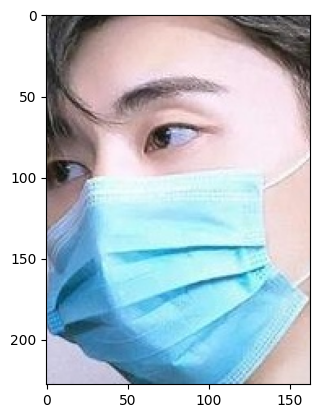

In [16]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

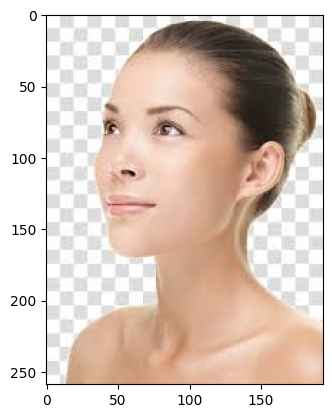

In [17]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [18]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
type(data)

list

In [20]:
len(data)

7553

array([[[185, 196, 202],
        [185, 196, 202],
        [185, 196, 202],
        ...,
        [115, 115, 117],
        [116, 116, 117],
        [117, 117, 117]],

       [[186, 197, 203],
        [186, 197, 203],
        [186, 197, 203],
        ...,
        [116, 116, 118],
        [115, 115, 116],
        [114, 114, 114]],

       [[186, 197, 203],
        [186, 197, 203],
        [186, 197, 203],
        ...,
        [116, 116, 118],
        [117, 117, 118],
        [119, 119, 119]],

       ...,

       [[200, 216, 222],
        [199, 217, 226],
        [203, 219, 224],
        ...,
        [ 99, 100, 104],
        [103, 104, 109],
        [104, 105, 110]],

       [[199, 216, 222],
        [198, 216, 225],
        [204, 218, 224],
        ...,
        [ 94,  95,  99],
        [104, 104, 109],
        [103, 104, 109]],

       [[200, 214, 221],
        [199, 215, 225],
        [204, 217, 223],
        ...,
        [ 82,  84,  89],
        [ 96,  98, 103],
        [103, 104, 109]]], dtype=uint8)
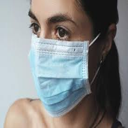

In [21]:
data[0]

In [22]:
type(data[0])

numpy.ndarray

In [23]:
data[0].shape

(128, 128, 3)

In [24]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [25]:
type(X)

numpy.ndarray

In [26]:
type(Y)

numpy.ndarray

In [27]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [28]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [31]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 14,  21,  39],
        [ 15,  22,  40],
        [ 19,  26,  44],
        ...,
        [ 31,  37,  55],
        [ 35,  41,  59],
        [ 15,  21,  39]],

       [[ 21,  28,  46],
        [ 21,  28,  46],
        [ 21,  28,  46],
        ...,
        [ 29,  36,  54],
        [ 78,  85, 103],
        [ 19,  25,  43]],

       [[ 20,  27,  45],
        [ 15,  22,  40],
        [ 14,  21,  39],
        ...,
        [ 17,  24,  42],
        [ 12,  19,  37],
        [ 17,  24,  42]]], dtype=uint8)
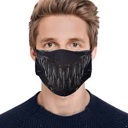

In [32]:
X_train[0]

In [33]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.05490196, 0.08235294, 0.15294118],
        [0.05882353, 0.08627451, 0.15686275],
        [0.0745098 , 0

**Building a Convolutional Neural Networks (CNN)**

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [37]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - acc: 0.6867 - loss: 0.6394 - val_acc: 0.8843 - val_loss: 0.2888
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8815 - loss: 0.2921 - val_acc: 0.9041 - val_loss: 0.2403
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9078 - loss: 0.2398 - val_acc: 0.9074 - val_loss: 0.2560
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9197 - loss: 0.1928 - val_acc: 0.8810 - val_loss: 0.2847
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9408 - loss: 0.1531 - val_acc: 0.9190 - val_loss: 0.2579


**Model Evaluation**

In [38]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9221 - loss: 0.2112
Test Accuracy = 0.9265387058258057


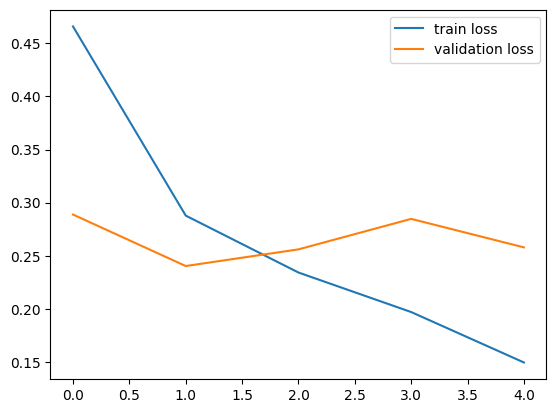

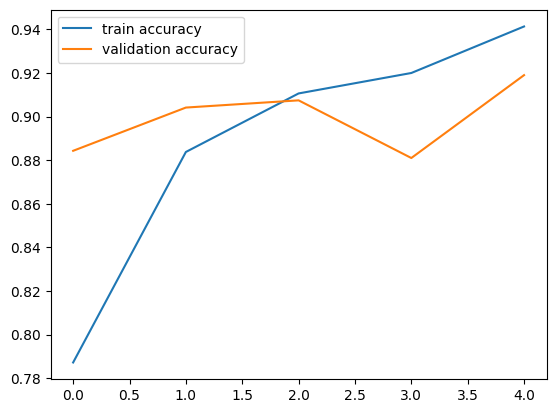

In [39]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test.png


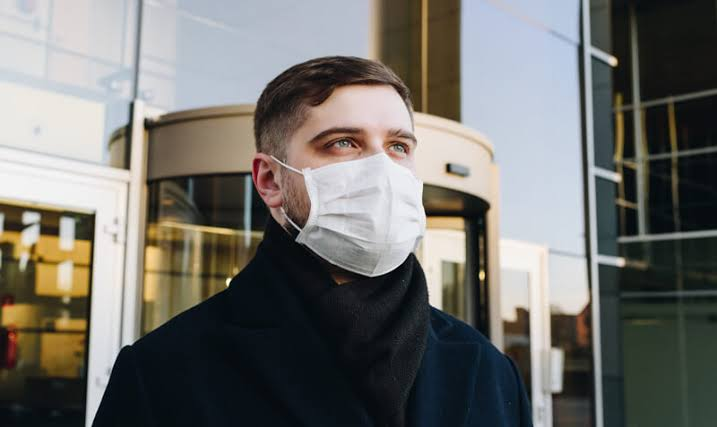

1/1 [==============================] - 0s 176ms/step
[[0.23994292 0.70647454]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test.jpg


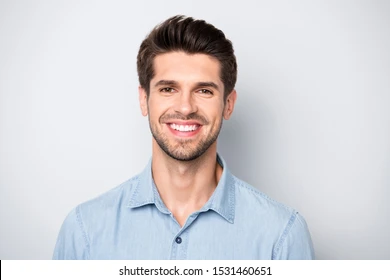

1/1 [==============================] - 0s 21ms/step
[[0.49811754 0.47740024]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')